# Analyzing Computed Features

In addition to the raw electrophysiology and morphology data, the Allen Institute also has computed many electrophysiological features about the cells in their data. These features describe the intrinsic electrophysiological properties of the cell. Here, we will demonstrate how to access and analyze these features both across and within cells.

In [1]:
#Import all the necessary packages and initalize an instance of the cache
import pandas as pd
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
import matplotlib.pyplot as plt

ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

print('Packages successfully downloaded.')

Packages successfully downloaded.


Below we'll create pandas dataframes for the electrophysiology data as well as metadata for all of the mouse cells in this dataset. Like the previous notebook, we'll [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) these dataframes and set the row indices to be the `id` column. Unlike the previous notebook, here we'll specify within `get_cells()` that we'd only like to use mouse cells. You can change the argument to `species = [CellTypesApi.HUMAN]` if you'd like to see human cells instead.

In [2]:
mouse_df = pd.DataFrame(ctc.get_cells(species = [CellTypesApi.MOUSE])).set_index('id')
ephys_df = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')
mouse_ephys_df = mouse_df.join(ephys_df)
mouse_ephys_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,...,14.738000,1.391268,-59.281254,-57.468754,-75.756252,1.564027,1.304349,1.679550,-87.906258,-74.926987
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,...,11.763808,1.290815,-55.875000,-52.515627,-69.109379,1.162618,1.197155,1.369171,-80.156250,-72.042976
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,...,8.432940,1.315510,-48.187500,-54.364586,-72.640628,3.379321,4.108774,2.680139,-83.593758,-72.712036
485909730,positive,"[8881.0, 953.839501299405, 7768.22695782726]",Mus musculus,Cux2-CreERT2;Ai14-205530.03.02.01,5,385,VISp,Cux2-CreERT2,spiny,intact,...,2.888133,1.520193,-54.031254,-57.385419,-77.750005,3.042933,3.517684,3.274181,-101.000000,-76.928391
323865917,positive,"[8125.0, 904.841803028986, 7819.69986630448]",Mus musculus,Scnn1a-Tg3-Cre;Ai14-172530.06.01.01,5,385,VISp,Scnn1a-Tg3-Cre,spiny,intact,...,3.467847,1.317042,-57.281254,-56.895833,-70.218751,2.974194,3.156117,2.946463,-88.406250,-69.402855


As you can see if you scroll to the right in the dataframe above, there are many **pre-computed features** available in this dataset. [Here's a glossary](https://docs.google.com/document/d/1YGLwkMTebwrXd_1E817LFbztMjSTCWh83Mlp3_3ZMEo/edit?usp=sharing), in case you're curious.

![](https://github.com/ajuavinett/CellTypesLesson/blob/master/docs/ap_features.png?raw=true)
Image from the <a href="http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf">Allen Institute Cell Types Database Technical Whitepaper.</a>
<br><br>

## Compare Features Across Cells

The Allen has many precomputed features that you might consider comparing across cells. Some of these features include input resistance ('input_resistance_mohm'), Adaptation ratio ('adaptation'), Average interspike interval ('avg_isi'), and many others. We've compiled [a complete glossary](https://docs.google.com/document/d/1YGLwkMTebwrXd_1E817LFbztMjSTCWh83Mlp3_3ZMEo/edit#heading=h.t0p3wngfkxc1) for you.

To compare cell types, we can subset our electrophysiology dataframe for a specific transgenic line, structure layer, brain area, and more. Below, we'll create two dataframes to compare cells with spiny dendrites to those with aspiny dendrites. While most excitatory cells are spiny, most inhibitory cells are aspiny.

In [3]:
# Define your cell type variables below
cell_type1 = 'spiny'
cell_type2 = 'aspiny'

# Create our dataframes from our cell types
mouse_spiny_df = mouse_ephys_df[mouse_ephys_df['dendrite_type'] == cell_type1]
mouse_aspiny_df = mouse_ephys_df[mouse_ephys_df['dendrite_type'] == cell_type2]

Now that we have two cell types we would like to compare, we can now use the precomputed features to plot some our cells' characteristics. Let's start by using a boxplot to compare the input resistance between our two cell types.

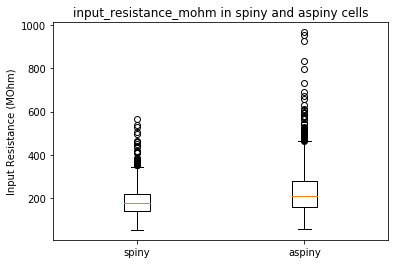

In [6]:
# Select our pre computed feature that we would like to compare 
feature = 'input_resistance_mohm'

# Get the pandas series for our feature from each dataframe. Drop any NaN values.
clean_spiny = mouse_spiny_df[feature].dropna()
clean_aspiny = mouse_aspiny_df[feature].dropna()

# Plot our figure and provide labels
plt.boxplot([clean_spiny, clean_aspiny])
plt.ylabel('Input Resistance (MOhm)')
plt.xticks([1,2], [cell_type1, cell_type2])
plt.title(feature + ' in ' + cell_type1 + ' and ' + cell_type2 + ' cells')

# Show our plot 
plt.show()

## Compare Features Within Cells

The power in this dataset is not only the ability to compare two cell types, but to look across all of the data for trends that emerge. Even if we dig into the weeds of the action potential shape, we can make some interesting observations.

Let's look at the speed of the trough, and the ratio between the upstroke and downstroke of the action potential:
- **Action potential fast trough** (<code>fast_trough_v_long_square</code>): Minimum value of the membrane potential in the interval lasting 5 ms after the peak.
- **Upstroke/downstroke ratio** (<code>upstroke_downstroke_ratio_long_square</code>)</b>: The ratio between the absolute values of the action potential peak upstroke and the action potential peak downstroke.</div>

The cell below will dig up the dendrite type of these cells and add that to our dataframe. Then, it'll create a scatterplot to compare the depth of the trough with the upstroke:downstroke ratio, where each dot is colored by dendrite type.

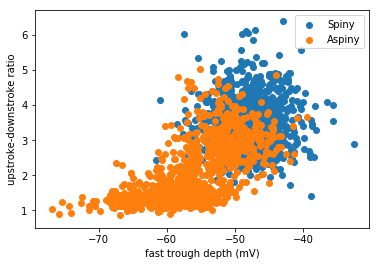

In [10]:
# Create our plot! Calling scatter twice like this will draw both of these on the same plot.
plt.scatter(mouse_spiny_df['fast_trough_v_long_square'],mouse_spiny_df['upstroke_downstroke_ratio_long_square'])
plt.scatter(mouse_aspiny_df['fast_trough_v_long_square'],mouse_aspiny_df['upstroke_downstroke_ratio_long_square'])

plt.ylabel('upstroke-downstroke ratio')
plt.xlabel('fast trough depth (mV)')
plt.legend(['Spiny','Aspiny'])
    
plt.show()

This is the true power of neural data science! It looks like the two clusters in the data partially relate to the dendritic type. Cells with spiny dendrites (which are typically excitatory cells) have a big ratio of upstroke:downstroke, and a more shallow trough (less negative). Cells with aspiny dendrites (typically inhibitory cells) are a little bit more varied. But </i>only</i> aspiny cells have a low upstroke:downstroke ratio and a deeper trough (more negative).